In [1]:
import pandas as pd
import numpy as np
from constants import db_types
import matplotlib.pyplot as plt
import seaborn as sns


### Cargamos el dataset

In [21]:
malware_data_train = pd.read_csv('new_train.csv', dtype=db_types)

### Empieza la exploración de resultados

In [22]:
malware_data_train.head(10)

,Unnamed: 0,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,8580390,f6349f44c52d69e41b22f1906a99b2a3,win8defender,1.1.15100.1,4.10.209.0,1.273.1589.0,0,7.0,0,NaN,...,17598.0,1,0.0,0.0,0,0,0.0,0.0,10.0,0.0
1,550980,0fd6d1876546211bd7f1013e001a2d16,win8defender,1.1.15200.1,4.10.209.0,1.275.727.0,0,7.0,0,NaN,...,20106.0,0,0.0,0.0,1,1,0.0,0.0,3.0,0.0
2,2467937,46cacc0e4a424bb5fef07d127e9bfc27,win8defender,1.1.14405.2,4.11.15063.447,1.259.1293.0,0,7.0,0,1632.0,...,63140.0,1,0.0,0.0,0,0,0.0,0.0,3.0,0.0
3,4368470,7d62dff04e9db44eca7597ef8097d15e,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1176.0,0,7.0,0,NaN,...,52436.0,0,NaN,0.0,0,0,0.0,NaN,NaN,0.0
4,4152733,772913940b6fb45fa81aeb56080222ef,win8defender,1.1.15100.1,4.18.1807.18075,1.273.738.0,0,7.0,0,NaN,...,63396.0,1,NaN,0.0,1,0,1.0,0.0,11.0,0.0
5,3831608,6df31d1441cdafd6f7cc42d98718752e,win8defender,1.1.15200.1,4.18.1807.18075,1.275.249.0,0,7.0,0,NaN,...,12943.0,0,NaN,0.0,0,0,0.0,0.0,1.0,0.0
6,4628623,84d7c4849ab515cfa37bb9f116a396dc,win8defender,1.1.15000.2,4.12.16299.15,1.271.795.0,0,7.0,0,NaN,...,69902.0,1,NaN,0.0,0,0,0.0,0.0,10.0,0.0
7,8171796,ea7a12208c1b4503c6b8ca890542753a,win8defender,1.1.15100.1,4.18.1807.18075,1.273.144.0,0,7.0,0,NaN,...,63122.0,1,0.0,0.0,0,0,0.0,0.0,1.0,0.0
8,2246550,4074b764b62d664032e1ba5854bb7bfc,win8defender,1.1.15200.1,4.9.10586.672,1.275.1423.0,0,5.0,0,NaN,...,3828.0,0,0.0,0.0,0,0,0.0,0.0,11.0,0.0
9,2557693,49607287d7aaea915097ee0e6a9dbbae,win8defender,1.1.15200.1,4.18.1807.18075,1.275.151.0,0,7.0,0,NaN,...,61280.0,0,NaN,0.0,1,0,0.0,0.0,1.0,0.0


In [23]:
# Forma
malware_data_train.shape

(139398, 84)

In [24]:
malware_data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139398 entries, 0 to 139397
Data columns (total 84 columns):
 #   Column                                             Non-Null Count   Dtype   
---  ------                                             --------------   -----   
 0   Unnamed: 0                                         139398 non-null  int64   
 1   MachineIdentifier                                  139398 non-null  category
 2   ProductName                                        139398 non-null  category
 3   EngineVersion                                      139398 non-null  category
 4   AppVersion                                         139398 non-null  category
 5   AvSigVersion                                       139398 non-null  category
 6   IsBeta                                             139398 non-null  int8    
 7   RtpStateBitfield                                   138898 non-null  float16 
 8   IsSxsPassiveMode                                   139398 non-nu

#### Observar los nulls con sus procentajes en cada columna

In [25]:
# Function to help return missing values with its percentage


def missing_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
        columns={0: 'Missing Values', 1: '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:, 1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
    return mis_val_table_ren_columns

In [26]:
print(missing_table(malware_data_train))

                                                   Missing Values  \
PuaMode                                                    139358   
Census_ProcessorClass                                      138760   
DefaultBrowsersIdentifier                                  132691   
Census_IsFlightingInternal                                 115680   
Census_InternalBatteryType                                  98945   
Census_ThresholdOptIn                                       88371   
Census_IsWIMBootEnabled                                     88268   
SmartScreen                                                 49595   
OrganizationIdentifier                                      42914   
SMode                                                        8393   
CityIdentifier                                               5165   
Wdft_IsGamer                                                 4672   
Wdft_RegionIdentifier                                        4672   
Census_InternalBatteryNumberOfChar

#### Distribución de los datos por tipo

In [27]:
# Helper para poder sacar las columnas de cada tipo
def lists_by_type_count():
    binary = [c for c in malware_data_train.columns if malware_data_train[c].nunique() == 2]
    numerical = ['Census_ProcessorCoreCount',
                 'Census_PrimaryDiskTotalCapacity',
                 'Census_SystemVolumeTotalCapacity',
                 'Census_TotalPhysicalRAM',
                 'Census_InternalPrimaryDiagonalDisplaySizeInInches',
                 'Census_InternalPrimaryDisplayResolutionHorizontal',
                 'Census_InternalPrimaryDisplayResolutionVertical',
                 'Census_InternalBatteryNumberOfCharges']
    categorical = [c for c in malware_data_train.columns if (c not in numerical) & (c not in binary)]
    return binary, numerical, categorical
    
binary_columns, true_numerical_columns, categorical_columns = lists_by_type_count()

In [28]:
total = malware_data_train.shape[0]
missing_df = []
for col in malware_data_train.columns:
    missing_df.append([col, malware_data_train[col].count(), total])

    
missing_df = pd.DataFrame(missing_df, columns=['Columna', 'Numero de incidencias', 'Total']).sort_values("Numero de incidencias", ascending=False)
type_df = [['Columnas binarias', len(binary_columns)], ['Columnas númericas', len(true_numerical_columns)], ['Columnas categoricas', len(categorical_columns)]]
type_df = pd.DataFrame(type_df, columns=['Tipo de dato', 'Numero de columnas']).sort_values('Numero de columnas', ascending=True)


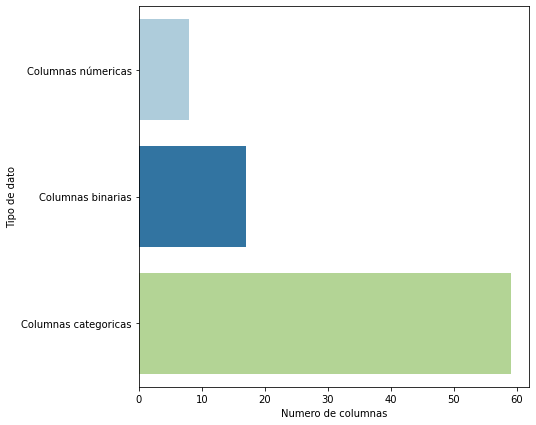

In [29]:
f, ax = plt.subplots(figsize=(7, 7))
sns.barplot(x="Numero de columnas", y="Tipo de dato", data=type_df, label="", palette='Paired')
plt.show()

Notamos que casi todo son variables categoricas

#### Ploteo de nulls

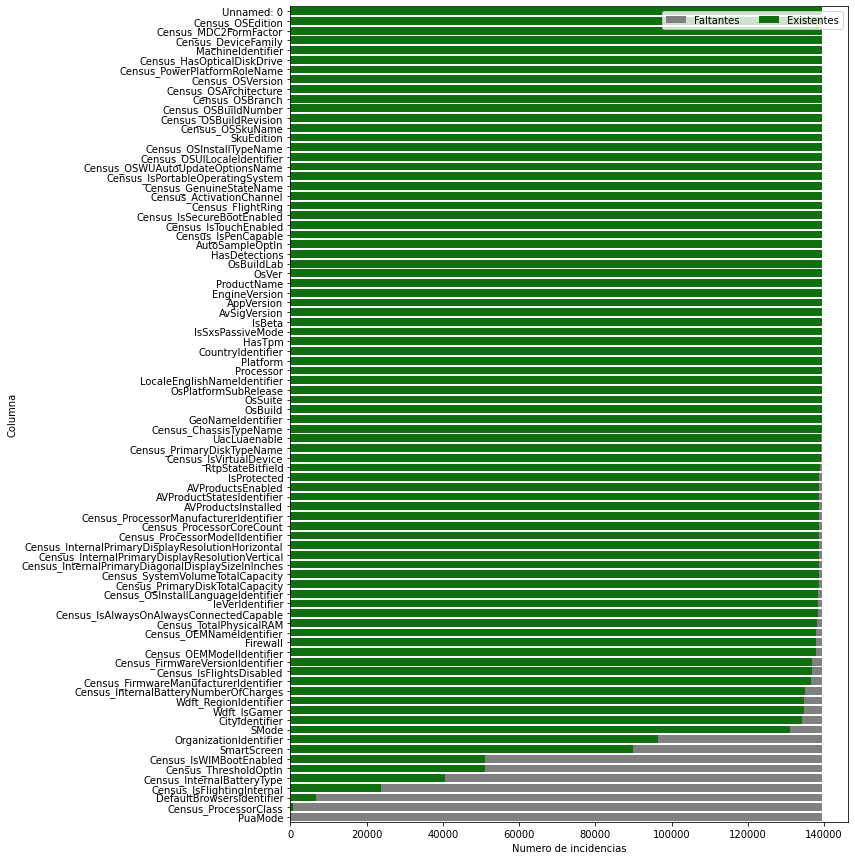

In [30]:
f, ax = plt.subplots(figsize=(10, 15))
sns.set_color_codes("pastel")
sns.barplot(x="Total", y="Columna", data=missing_df, label="Faltantes", color="gray")
sns.barplot(x="Numero de incidencias", y="Columna", data=missing_df, label="Existentes", color="green")
ax.legend(ncol=2, loc="upper right", frameon=True)
plt.show()

Una representación grafica de lo que pudimos observar arriba donde notamos que hay columnas que debemos botar las cuales serian puaMode, census_processorClass, DefaultIdentifiar  entre otras que tienenn muchos nulls

#### Unique count de cada columna

In [31]:
def unique_val(data, columns):
    unique = []
    for col in columns:
        u = data[col].nunique()
        unique.append((col,u,data[col].value_counts(normalize=True).values[0] * 100))
    return unique

In [32]:
unique1 = unique_val(malware_data_train, categorical_columns)
unique_values_g = pd.DataFrame(unique1, columns = ['Features','unique_values','PP']).sort_values('unique_values',ascending = False)
unique_values_g

,Features,unique_values,PP
0,Unnamed: 0,139398,0.000717
1,MachineIdentifier,139398,0.000717
32,Census_OEMModelIdentifier,19622,3.463841
13,CityIdentifier,19325,1.058607
56,Census_FirmwareVersionIdentifier,14457,1.033314
5,AvSigVersion,4500,1.108337
9,AVProductStatesIdentifier,2554,65.442586
34,Census_ProcessorModelIdentifier,1844,3.264621
31,Census_OEMNameIdentifier,995,14.670350
23,OsBuildLab,385,40.852810


In [33]:
# Las columnas con un balance donde el el procentaje del grupo que abarca mas del 85% de todas las incidencias
imbalanced_columns = unique_values_g[unique_values_g['PP'] > 85.0]
imbalanced_columns

,Features,unique_values,PP
19,OsVer,13,96.615446
54,Census_FlightRing,7,93.652707
7,RtpStateBitfield,7,97.305937
11,AVProductsEnabled,5,97.383248
51,Census_GenuineStateName,4,88.371426
17,Platform,4,96.449016
33,Census_ProcessorManufacturerIdentifier,4,88.252120
28,UacLuaenable,3,99.408934
18,Processor,3,90.822680
41,Census_OSArchitecture,3,90.823398


Notamos que todas estas columnas mas del 85% de los datos lo ocupa una sola clase

In [34]:
imbalanced_columns_by_count = unique_values_g[unique_values_g['unique_values'] > 300]
imbalanced_columns_by_count

,Features,unique_values,PP
0,Unnamed: 0,139398,0.000717
1,MachineIdentifier,139398,0.000717
32,Census_OEMModelIdentifier,19622,3.463841
13,CityIdentifier,19325,1.058607
56,Census_FirmwareVersionIdentifier,14457,1.033314
5,AvSigVersion,4500,1.108337
9,AVProductStatesIdentifier,2554,65.442586
34,Census_ProcessorModelIdentifier,1844,3.264621
31,Census_OEMNameIdentifier,995,14.670350
23,OsBuildLab,385,40.852810


Notamos que todas estas variables tienen alta cardinalidad

## Observemos como se enceuntran distribuidos nuestros valores para detección

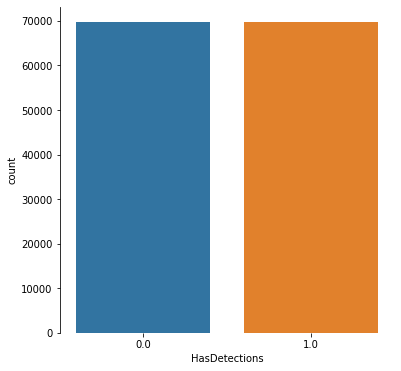

In [35]:
f, ax = plt.subplots(figsize=(6, 6))
ax = sns.countplot(x="HasDetections", data=malware_data_train, label="Count")
sns.despine(bottom=True)

Notamos que esta balanceado de manera perfecta

## Comparaciones con has detecions

### Si es de gamer 

In [36]:
# this function will plot percentages on the bar graphs on seaborn plots with 'hue' 
# it takes the actual graph, feature, Number_of_categories in feature 
# and hue_categories(number of cateogories in hue feature) as a paramater
def with_hue(plot, feature, Number_of_categories,hue_categories):
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12)
    plt.show()

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


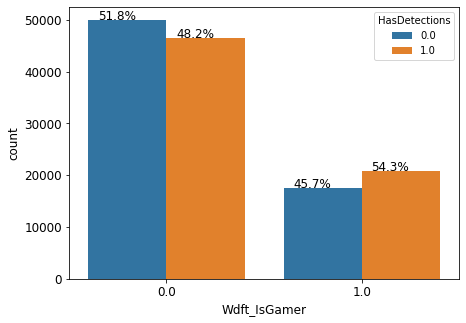

In [37]:
plt.figure(figsize = (7,5))
ax = sns.countplot('Wdft_IsGamer', hue= 'HasDetections', data = malware_data_train)
plt.xticks(size = 12)
plt.xlabel('Wdft_IsGamer', size = 12)
plt.yticks(size = 12)
plt.ylabel('count', size = 12)

with_hue(ax, malware_data_train.Wdft_IsGamer,2,2)

Notamos que estan bastante balanceados pero principalmente notamos que con una baja diferencia pero los que son gamers parecerian tener mas probabilidad de ataques

### Cores

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


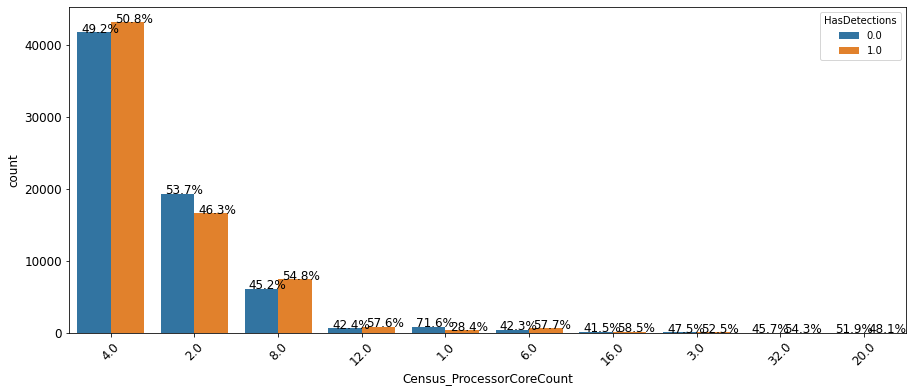

In [38]:
plt.figure(figsize = (15,6))
ax = sns.countplot('Census_ProcessorCoreCount', 
                   order = malware_data_train.Census_ProcessorCoreCount.value_counts().iloc[:10].index, 
                   hue = 'HasDetections', 
                   data = malware_data_train
                  )
plt.xticks(rotation = 45, size = 12)
plt.xlabel('Census_ProcessorCoreCount', size = 12)
plt.yticks(size = 12)
plt.ylabel('count', size = 12)

with_hue(ax, malware_data_train.Census_ProcessorCoreCount, 10,2)

A simple vosta notamos que los tres grupos mas populares son los quad core seguido de los dual core y octa core pareceria que en estos probablemente no sea un factor para la detección

### CountryIdentifier

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


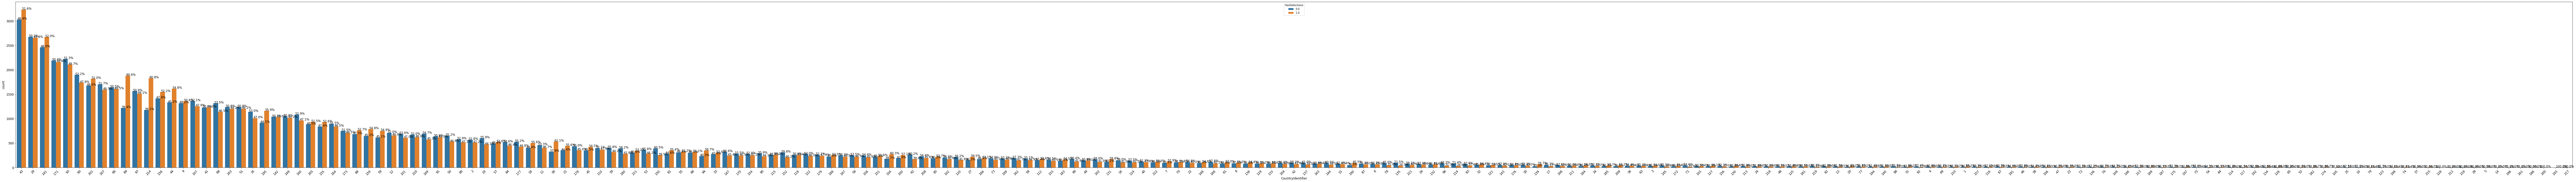

In [43]:
countries_size = len(malware_data_train["CountryIdentifier"].unique())
plt.figure(figsize = (180,12))
ax = sns.countplot('CountryIdentifier', 
                   order = malware_data_train.CountryIdentifier.value_counts().index, 
                   hue = 'HasDetections', 
                   data = malware_data_train
                  )
plt.xticks(rotation = 45, size = 12)
plt.xlabel('CountryIdentifier', size = 12)
plt.yticks(size = 12)
plt.ylabel('count', size = 12)

with_hue(ax, malware_data_train.CountryIdentifier, countries_size,2)

Notamos al abrir la imagen en otro tab que por país no afecta realmente mucho solo en el caso del país 89 o 214 o 95 pero no son la mayoría de incidencias si no que la mayoria esta bastante parejo